## Import Packages

In [1]:
import os
import sys
import dtreeviz
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
warnings.filterwarnings("ignore")

## Load Sample Data

In [2]:
import seaborn as sns
dataset = sns.load_dataset("titanic")
dataset.fillna({"age":dataset.age.mean()}, inplace=True)
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# Encode categorical variables
dataset["sex_label"] = dataset.sex.astype("category").cat.codes
dataset["class_label"] = dataset["class"].astype("category").cat.codes
dataset["embarked_label"] = dataset.embarked.astype("category").cat.codes
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_label,class_label,embarked_label
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1,2,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0,2,2
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0,0,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1,2,2


## Classification

In [4]:
features = ["pclass", "age", "fare", "sex_label", "class_label", "embarked_label"]
target = "survived"
random_state = 14
tree_classifier = DecisionTreeClassifier(max_depth=3, random_state=random_state)
tree_classifier.fit(dataset[features].values, dataset[target].values)

DecisionTreeClassifier(max_depth=3, random_state=14)

In [5]:
viz_model = dtreeviz.model(tree_classifier,
                           X_train=dataset[features], y_train=dataset[target],
                           feature_names=features,
                           target_name=target, class_names=["perish", "survive"])

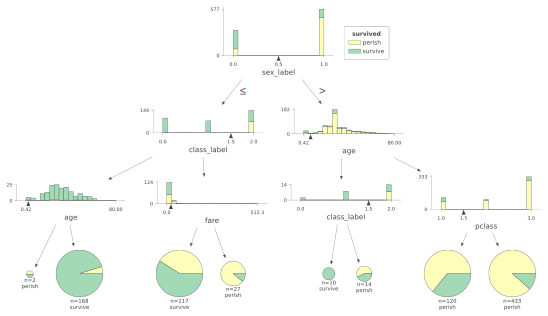

In [6]:
viz_model.view(scale=0.8)

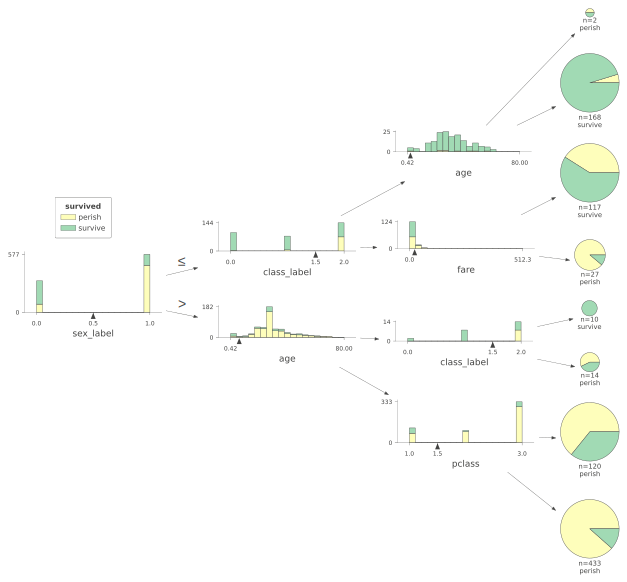

In [7]:
viz_model.view(orientation="LR")

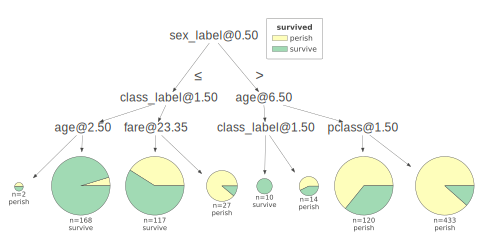

In [8]:
viz_model.view(fancy=False)

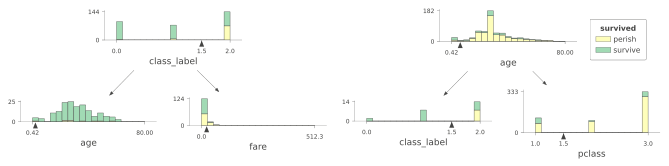

In [9]:
viz_model.view(depth_range_to_display=(1, 2))

In [10]:
x = dataset[features].iloc[10]
x

pclass             3.0
age                4.0
fare              16.7
sex_label          0.0
class_label        2.0
embarked_label     2.0
Name: 10, dtype: float64

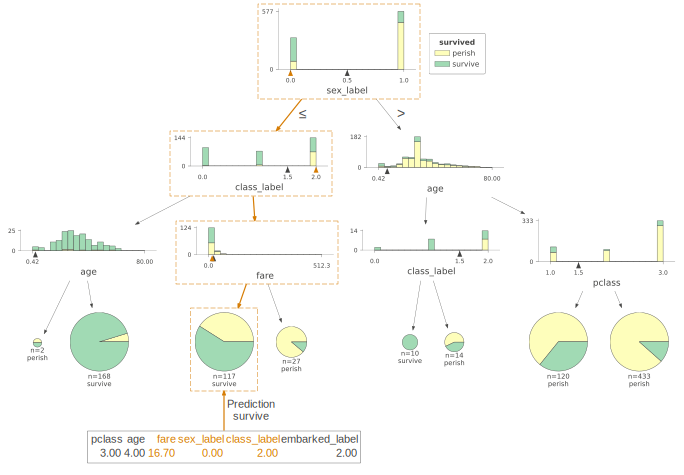

In [11]:
viz_model.view(x=x)

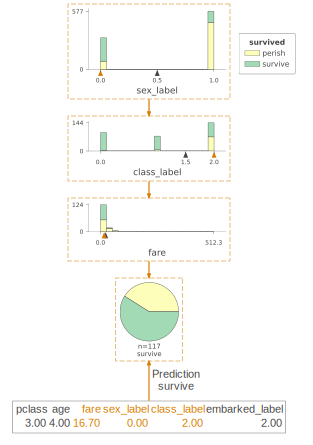

In [12]:
viz_model.view(x=x, show_just_path=True)

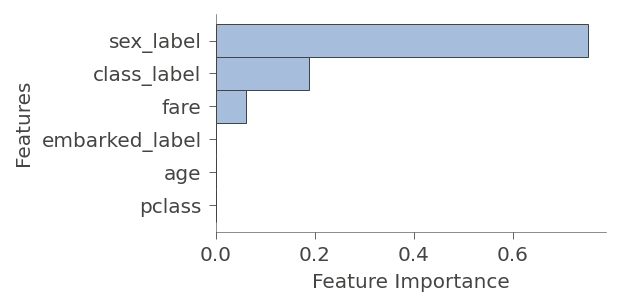

In [13]:
viz_model.instance_feature_importance(x, figsize=(3.5,2))

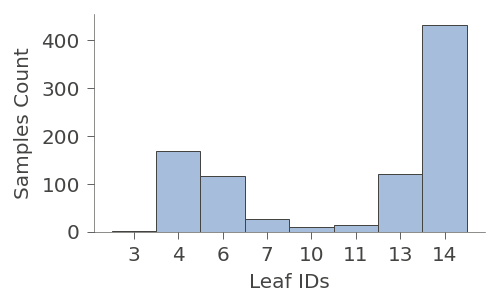

In [14]:
viz_model.leaf_sizes(figsize=(3.5,2))

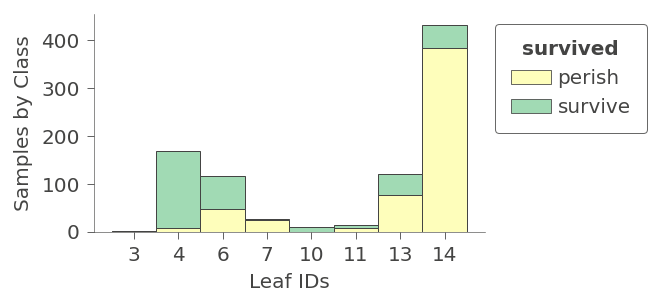

In [15]:
viz_model.ctree_leaf_distributions(figsize=(3.5,2))

In [16]:
viz_model.node_stats(node_id=6)

,pclass,age,fare,sex_label,class_label,embarked_label
count,117.0,117.000000,117.000000,117.0,117.0,117.000000
mean,3.0,23.976667,11.722829,0.0,2.0,1.341880
std,0.0,10.534377,4.695136,0.0,0.0,0.789614
min,3.0,0.750000,6.750000,0.0,2.0,0.000000
25%,3.0,18.000000,7.775000,0.0,2.0,1.000000
50%,3.0,27.000000,9.587500,0.0,2.0,2.000000
75%,3.0,29.699118,15.500000,0.0,2.0,2.000000
max,3.0,63.000000,23.250000,0.0,2.0,2.000000


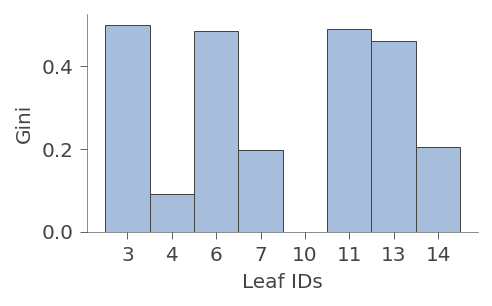

In [17]:
viz_model.leaf_purity(figsize=(3.5,2))

## Regression

In [18]:
features_reg = ["pclass", "fare", "sex_label", "class_label", "embarked_label", "survived"]
target_reg = "age"

tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=random_state, criterion="absolute_error")
tree_regressor.fit(dataset[features_reg].values, dataset[target_reg].values)

DecisionTreeRegressor(criterion='absolute_error', max_depth=3, random_state=14)

In [19]:
viz_rmodel = dtreeviz.model(model=tree_regressor, 
                            X_train=dataset[features_reg], 
                            y_train=dataset[target_reg], 
                            feature_names=features_reg, 
                            target_name=target_reg)

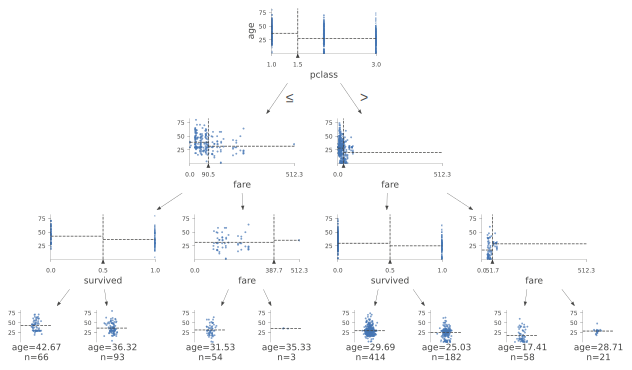

In [20]:
viz_rmodel.view()

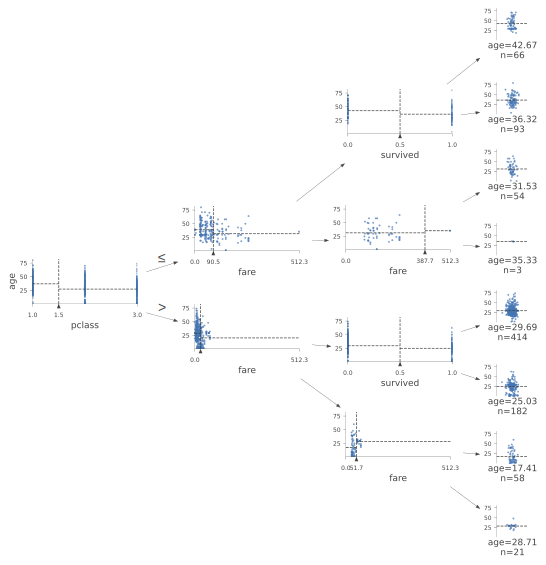

In [21]:
viz_rmodel.view(orientation="LR")